In [0]:
! wget https://www.dropbox.com/s/kvft75s9xxpbo9l/DAGM2007.zip?dl=0 -qcN -O DAGM2007.zip
! unzip -qq -o DAGM2007  
! ls

Class1	    Class2_def	Class4	    Class5_def	DAGM2007.zip
Class1_def  Class3	Class4_def  Class6	sample_data
Class2	    Class3_def	Class5	    Class6_def


(512, 512)


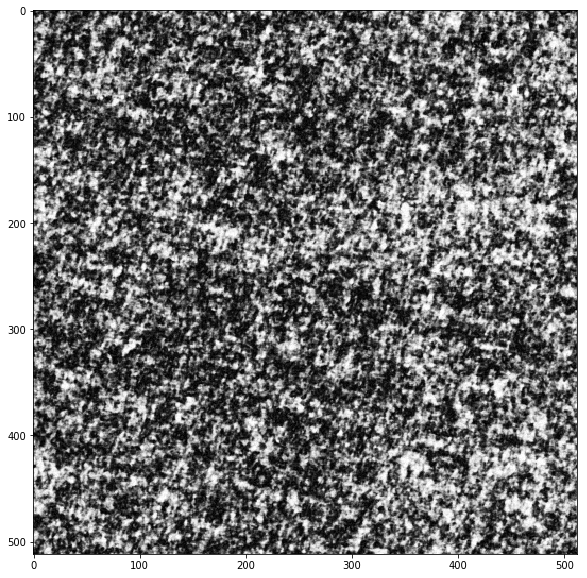

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
img = np.array(Image.open('Class6/1.png'))
height, width = img.shape
print(img.shape)
plt.gray()
plt.imshow(img)

(512, 512)


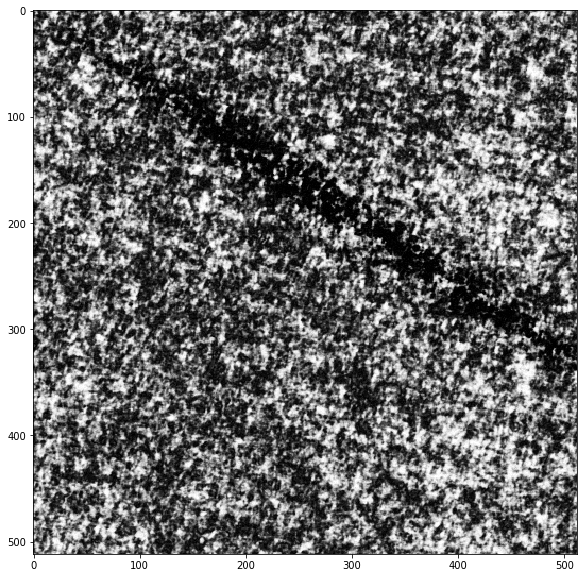

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
img = np.array(Image.open('Class6_def/1.png'))
height, width = img.shape
print(img.shape)
plt.gray()
plt.imshow(img)

(512, 512)


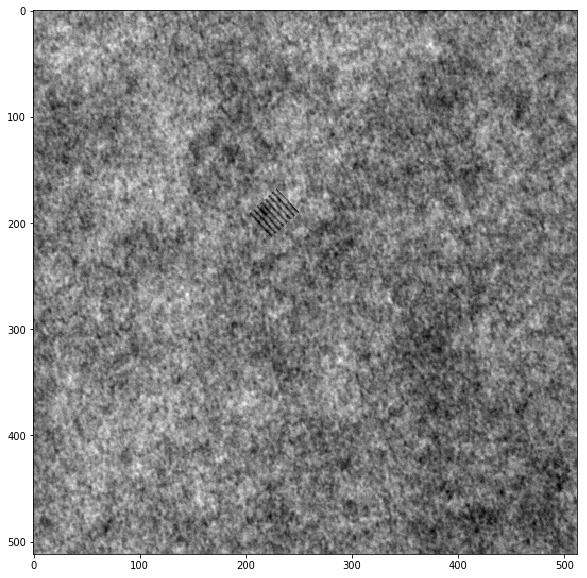

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
img = np.array(Image.open('Class5_def/1.png'))
height, width = img.shape
print(img.shape)
plt.gray()
plt.imshow(img)

In [0]:
import os 
class_name = 'Class6'

#元の画像サイズ
SRC_IMAGE_SIZE = 512
#リサイズ後の画像サイズ
IMAGE_SIZE = 128

#縦横それぞれの分割数
n_split = 16

#分割後の画像サイズ
patch_size = IMAGE_SIZE // n_split

#読み込むファイル数
n_train_imgs = 100

def load_images(path, maxlen=100):
    imgs =[]
    for i in range(i, maxlen+1):
        img = image.open(os.path.join(path, str(i) + '.png'))
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE), image.BILINEAR)
        img = np.array(img)
        for h_img in np.vsplit(img, n_split):
            imgs.extend(np.hsplit(h_img, n_split))
            #for v_img in np.hsplit(h_img, nsplit):
            #    imgs.append(v_img)
    return np.array(img)
  
X = load_images(class_name, n_train_imgs)

plt.figure(figsize=(10, 10))
for i, g in enumerate(X[:n_split * n_split])
            

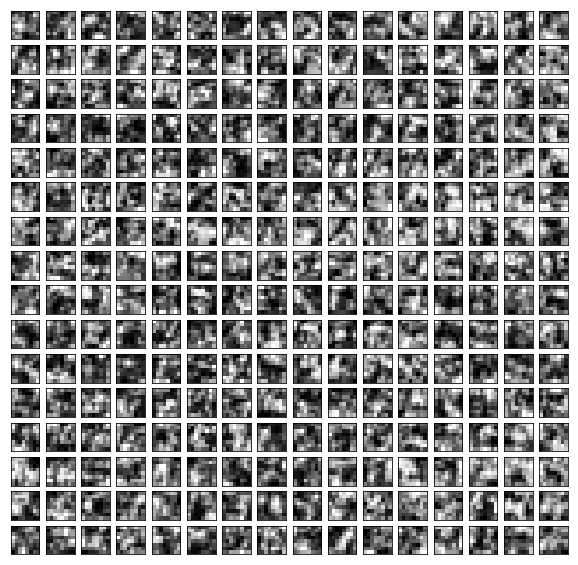

In [0]:
import os

class_name = 'Class6'

# 元の画像サイズ
SRC_IMAGE_SIZE = 512
# リサイズ後の画像サイズ
IMAGE_SIZE = 128
# 縦横それぞれの分割数
n_split = 16
# 分割後の画像サイズ
patch_size = IMAGE_SIZE // n_split
# 読み込むファイル数
n_train_imgs = 100

def load_images(path, maxlen=100):
    imgs = []
    for i in range(1, maxlen+1):
        img = Image.open(os.path.join(path, str(i) + '.png'))
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.BILINEAR)
        img = np.array(img)
        for h_img in np.vsplit(img, n_split):
            imgs.extend(np.hsplit(h_img, n_split))
    return np.array(imgs)

X = load_images(class_name, n_train_imgs)

plt.figure(figsize=(10, 10))
for i, g in enumerate(X[:n_split * n_split]):
    plt.subplot(n_split, n_split, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(g)
plt.show()

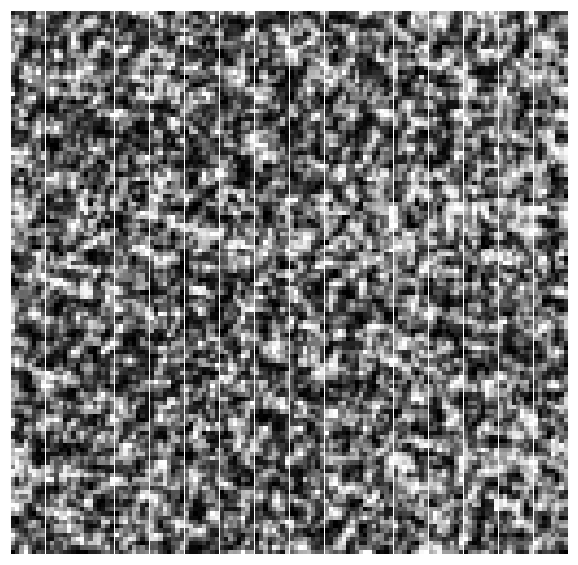

In [0]:
def show_patches(X, index):
    plt.figure(figsize=(10,10))
    offset = n_split * n_split
    plt.subplots_adjust(wspace=0, hspace=0)
    for i, g in enumerate(X[index * offset : index * offset + offset]):
        plt.subplot(n_split, n_split, i+1)
        plt.box(False)
        plt.xticks([]); plt.yticks([])
        plt.imshow(g)
    plt.show()
    
show_patches(X, 0)
        

In [0]:
print(X.shape)

(25600, 8, 8)


In [0]:
#明示的に1チャネルの画像であると書く。4次元のデータに直す
X_train = X.reshape(n_train_imgs * n_split * n_split, patch_size, patch_size, 1)
print(X_train.shape)

(25600, 8, 8, 1)


In [0]:
X_train = X_train.astype('float32')
X_train /= 255

In [0]:
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, add, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers


inputs = Input(shape=(patch_size, patch_size, 1))
x = Convolution2D,(8, (3,3), padding='same', kernel_initializer='he_normal')(inputs)
x = MaxPooling2D()(x)
x = Convolution2D,(8, (3,3), padding='same', kernel_initializer='he_normal')(x)
x = MaxPooling2D()(x)

x = Convolution2D,(8, (3,3), padding='same', kernel_initializer='he_normal')(x)
x = MaxPooling2D()(x)
x = Convolution2D,(8, (3,3), padding='same', kernel_initializer='he_normal')(x)
x = MaxPooling2D()(x)
outputs = Cond2D(1, (3,3), activation='sigmoid', padding='same', kernel_initializer='he_normal')
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

SyntaxError: ignored

In [0]:
from keras.layers import Input, Dense, BatchNormalization
from keras.layers.convolutional import Conv2D, UpSampling2D, MaxPooling2D
from keras.models import Model

inputs = Input(shape=(patch_size, patch_size, 1))
x = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D()(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D()(x)
outputs = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 8)           80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 4)           292       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 4)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 4)           148       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 4, 4, 4)           0         
__________

In [0]:
model.fit(X_train, X_train,
         epochs=10,
         batch_size=128,
         validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 23040 samples, validate on 2560 samples
Epoch 1/10
23040/23040 [==============================] - 6s 259us/step - loss: 0.2101 - val_loss: 0.0172
Epoch 2/10
23040/23040 [==============================] - 1s 45us/step - loss: 0.0163 - val_loss: 0.0156
Epoch 3/10
23040/23040 [==============================] - 1s 45us/step - loss: 0.0123 - val_loss: 0.0116
Epoch 4/10
23040/23040 [==============================] - 1s 45us/step - loss: 0.0114 - val_loss: 0.0115
Epoch 5/10
23040/23040 [==============================] - 1s 45us/step - loss: 0.0113 - val_loss: 0.0115
Epoch 6/10
23040/23040 [==============================] - 1s 45us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 7/10
23040/23040 [==============================] - 1s 46us/step - loss: 0.0112 - val_loss: 0.0114
Epoch 8/10
23040/23040 [==============================] - 1s 45us/step - loss: 0.0112 - val_loss: 0.0114
Epoch 9/10
23040/23040 [==============================] - 1s 4

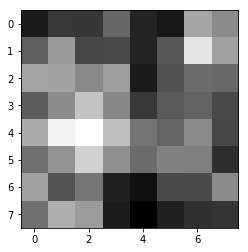

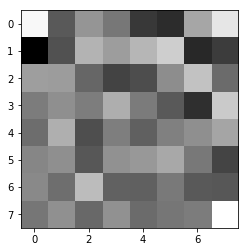

In [0]:
decoded_images = model.predict(X_train)

idx = 0
plt.imshow(X_train[idx].reshape(patch_size, patch_size))
plt.show()

plt.imshow(decoded_images[idx].reshape(patch_size, patch_size))
plt.show()


In [0]:
n_test_imgs = 100
X_test = load_images(class_name + '_def', n_test_imgs)
X_test = X_test.reshape(n_test_imgs * n_split * n_split, patch_size, patch_size, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [0]:
decoded_images = model.predict(X_test)

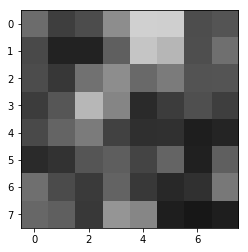

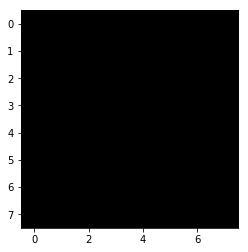

In [0]:
idx = 0
plt.imshow(X_test[idx].reshape(patch_size, patch_size), cmap='binary_r', vmax=1.0, vmin=0.0)
plt.show()

plt.imshow(decoded_images[idx].reshape(patch_size, patch_size), cmap='binary_r', vmax=1.0, vmin=0.0)
plt.show()

In [0]:
_x = np.array([X_test[idx]])
_y = np.array([decoded_images[idx]])
loss = model.evaluate(_x, _y, batch_size=1)

1/1 [==============================] - 0s 3ms/step


(8, 8, 1)


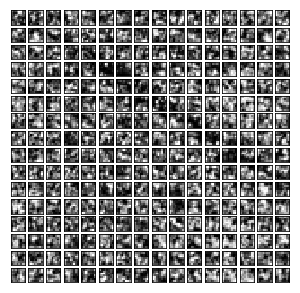

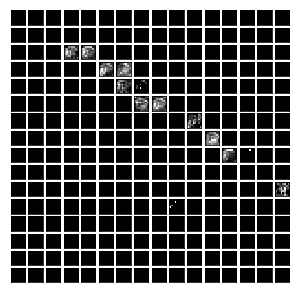

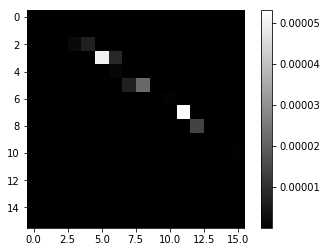

In [0]:
index = 0
offset = n_split * n_split

print(X_test[index].shape)
heatmap = np.zeros((n_split * n_split), dtype=np.float32)


# 元の画像
plt.figure(figsize=(5,5))
for i in range(index * offset, index * offset + offset):
    m = X_test[i]
    plt.subplot(n_split, n_split, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(m.reshape(patch_size, patch_size))
plt.show()

# 再構成画像
plt.figure(figsize=(5,5))
for i in range(index * offset, index * offset + offset):
    m = decoded_images[i]
    plt.subplot(n_split, n_split, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(m.reshape(patch_size, patch_size))
plt.show()

for i in range(index * offset, index * offset + offset):
    _x = np.array([X_test[i]])
    _y = np.array([decoded_images[i]])
    
    loss = model.evaluate(_x, _y, batch_size=1, verbose=0)
    heatmap[i] = loss
    #rmse = np.sqrt(np.mean(X_test[i] - decoded_images[i] ** 2))
    #heatmap[i] = rmse


plt.imshow(heatmap.reshape(n_split, n_split))
plt.colorbar()
plt.show()

(128, 128, 3)


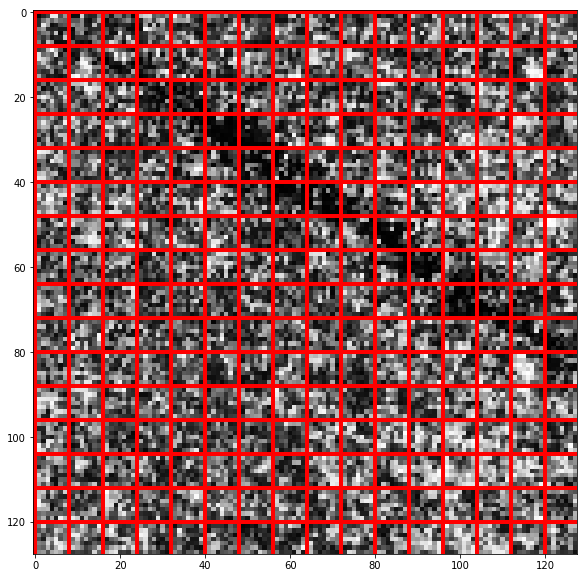

In [0]:
import cv2
img = cv2.imread('Class6_def/1.png', 1)
img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

plt.figure(figsize=(10,10))
for i in range(n_split * n_split):
    if heatmap[i] < 0.5:
        x1 = (i % n_split) * patch_size
        y1 = (i // n_split) * patch_size
        x2 = x1 + patch_size
        y2 = y1 + patch_size
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 1)

height, width, channel = img.shape
print(img.shape)
plt.gray()
plt.imshow(img)

(128, 128, 3)


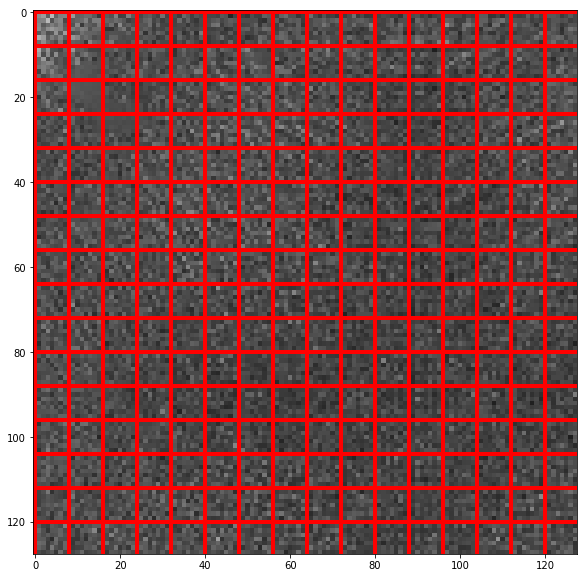

In [0]:
import cv2
img = cv2.imread('Class1_def/1.png', 1)
img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

plt.figure(figsize=(10,10))
for i in range(n_split * n_split):
    if heatmap[i] < 0.5:
        x1 = (i % n_split) * patch_size
        y1 = (i // n_split) * patch_size
        x2 = x1 + patch_size
        y2 = y1 + patch_size
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 1)

height, width, channel = img.shape
print(img.shape)
plt.gray()
plt.imshow(img)

(128, 128, 3)


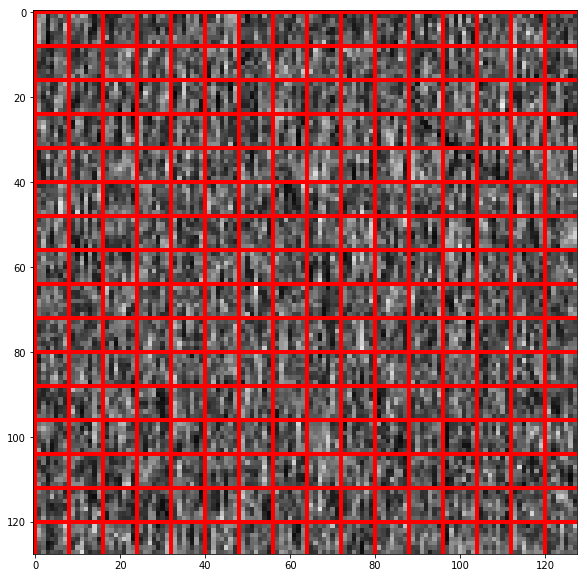

In [0]:
import cv2
img = cv2.imread('Class2_def/1.png', 1)
img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

plt.figure(figsize=(10,10))
for i in range(n_split * n_split):
    if heatmap[i] < 0.5:
        x1 = (i % n_split) * patch_size
        y1 = (i // n_split) * patch_size
        x2 = x1 + patch_size
        y2 = y1 + patch_size
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 1)

height, width, channel = img.shape
print(img.shape)
plt.gray()
plt.imshow(img)